# Classification des documents du procès des groupes américains du tabac

In [1]:
#Listes des imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import preprocessing
import seaborn as sns

## 1- Analyse  des données

In [2]:
# Chargement du fichier text (affichage des 10 premier résultats)
df=pd.read_csv("data/tobacco-lab_data_Tobacco3482.csv") 
print(df[:10])

                       img_path          label
0  Advertisement/0000136188.jpg  Advertisement
1  Advertisement/0000435350.jpg  Advertisement
2  Advertisement/0000556056.jpg  Advertisement
3  Advertisement/0030048095.jpg  Advertisement
4  Advertisement/0030048989.jpg  Advertisement
5  Advertisement/0030049569.jpg  Advertisement
6    Advertisement/03496270.jpg  Advertisement
7    Advertisement/03567810.jpg  Advertisement
8    Advertisement/03722789.jpg  Advertisement
9    Advertisement/04102204.jpg  Advertisement


Le fichier contient le pas vers l'image à associer dans la colonne *"img_path"* et sa classe dans la colonne *"label"*.

number of data : 3482


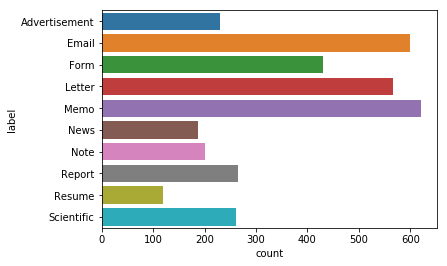

In [3]:
# Plot the statistics of each label
sns.countplot(data=df,y='label')
print('number of data :', df.shape[0])

In [6]:
# On extrait le texte des fichiers et l'on stocke chaque texte dans une liste text
# On stocke les label de chaque text dans une liste label
label=[]
text=[]
for i in range(df.shape[0]):
    path=path='data/Tobacco3482-OCR/'+str(df.img_path[i][:-3])+'txt'
    with open(path) as myfile:
        content = myfile.readlines()
        for j,e in enumerate(content):
            #retrait des /n pour une meilleurs lisibilité et augmente les performances
            content[j]=e.rstrip("\n")
    text.append(content)
    label.append(df.label[i])
print(text[0][:5])
print(np.unique(label))

['A Mpertant as yar', 'sesiye teaetered cabiieess. Baely', '', 'doesn’) keow bea te', 'Bitton Aau-Fotne bl resin syste. Cant']
['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific']


In [7]:
# création d'un dataframe contenant chaque test et les labels associés
cont=pd.DataFrame({'text':text, 'label':label})
print(cont[:5])
print(cont.shape)

                                                text          label
0  [A Mpertant as yar, sesiye teaetered cabiieess...  Advertisement
1  [TE che fitm, , m66400 7127, , KOOLS are the o...  Advertisement
2  [so ARN Rr nr, , BWR Ga ||, , Vending Operator...  Advertisement
3  [MARCH 24,19 VO — 3. Tersrearep, ,  , , ‘ yi i...  Advertisement
4  [~, , Spend a milder moment qs, with Raleigh.,...  Advertisement
(3482, 2)


In [8]:
# Texte ci-dessus stocker sous forme de séquences de mots
# faire de text un text et non une sequence de mot
cont['text']=[" ".join(text) for text in cont['text'].values]
print(cont[:5])

                                                text          label
0  A Mpertant as yar sesiye teaetered cabiieess. ...  Advertisement
1  TE che fitm  m66400 7127  KOOLS are the only c...  Advertisement
2  so ARN Rr nr  BWR Ga ||  Vending Operators    ...  Advertisement
3  MARCH 24,19 VO — 3. Tersrearep     ‘ yi ills :...  Advertisement
4  ~  Spend a milder moment qs with Raleigh.  = A...  Advertisement


## 2- Traitement des données

### 2-1 Transformation en sac de mots

In [9]:
#Séparation des données en ensemble de test et d'apprentissage
X_train,X_test, y_train,y_test = train_test_split(cont.text, cont.label, test_size=0.20, 
                                                random_state=42)
print('nb exemple apprentissage :' ,X_train.shape)
print('nb exemple de test:', X_test.shape)


nb exemple apprentissage : (2785,)
nb exemple de test: (697,)


In [10]:
# Vectorisation
vectorizer = CountVectorizer(max_features=3000)
vectorizer.fit(X_train)
X_train_vect = vectorizer.transform(X_train)
X_test_vect= vectorizer.transform(X_test)

print(X_test_vect.shape)

(697, 3000)


### 2.2 Représentation tf idf 

In [11]:
# Représentation TF_IDF
tf_transformer = TfidfTransformer().fit(X_train_vect)

# transformation tf-idf des ensemble train, dev et test
X_train_tf = tf_transformer.transform(X_train_vect)
X_test_tf = tf_transformer.transform(X_test_vect)


## 3- Classification

### 3-1 Classifieur naives bayes

In [19]:
# Entrainement avec un classifieur naif multinomial
# train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Definition du classifieur
mnb=MultinomialNB()

# Entrainement du classifieur
mnb.fit(X_train_vect, y_train)

# Observasion de la précision
acc_test=mnb.score(X_test_vect, y_test)
y_pred=mnb.predict(X_test_vect)

print('la précision obtenus sur les données de test est :',acc_test,'\n' )

print('Les valeur de précision, recall et fscore obtenus par rapport à chaque classes sont : ')


label=np.unique(cont.label)
target_names = [c for c in label ]
print(classification_report(y_test, y_pred, target_names=target_names))
print('confusion_matrix : \n',confusion_matrix(y_test, y_pred, ))

la précision obtenus sur les données de test est : 0.7302725968436155 

Les valeur de précision, recall et fscore obtenus par rapport à chaque classes sont : 
               precision    recall  f1-score   support

Advertisement       0.73      0.67      0.70        57
        Email       0.93      0.93      0.93       135
         Form       0.81      0.82      0.81        88
       Letter       0.75      0.72      0.74       122
         Memo       0.60      0.73      0.66       109
         News       0.69      0.74      0.71        34
         Note       0.33      0.33      0.33        36
       Report       0.59      0.56      0.57        48
       Resume       1.00      1.00      1.00        15
   Scientific       0.68      0.49      0.57        53

    micro avg       0.73      0.73      0.73       697
    macro avg       0.71      0.70      0.70       697
 weighted avg       0.73      0.73      0.73       697

confusion_matrix : 
 [[ 38   1   2   1   5   2   8   0   0   0]
 [  

Précision de 73% avec le classifieur de naïves bayes et une représentation tf_idf 

### 3-2 Classification with Neural networks

In [32]:
import ast
import os
#from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten, LSTM
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence

In [33]:
# Model parameters
MAX_FEATURES = 2000
MAX_TEXT_LENGTH = 2000
EMBED_SIZE  = 100
BATCH_SIZE = 16
EPOCHS = 30
VALIDATION_SPLIT = 0.1

In [34]:
#séparation en ensemble test apprentissage
X_train,X_test, y_train,y_test = train_test_split(cont.text, cont.label, test_size=0.10, 
                                                random_state=42)
print('nb exemple apprentissage :' ,X_train.shape)
print('nb exemple de test:', X_test.shape)

def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

nb exemple apprentissage : (3133,)
nb exemple de test: (349,)


In [35]:
def get_model():

    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_TEXT_LENGTH,EMBED_SIZE)(inp)
    model = Dropout(0.3)(model)
    model = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = Flatten()(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

def model_2():
    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_TEXT_LENGTH,EMBED_SIZE)(inp)
    model = Dropout(0.3)(model)
    model = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=4)(model)
    
    model = Dropout(0.25)(model)
    model = LSTM(100)(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


In [36]:
def train_fit_predict(model, x_train, x_test, y):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)

In [37]:
# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert class string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = model_2()

# Define training procedure
#model.fit(x=x_vec_train, y=train_y_cat, batch_size=16, epochs=10, verbose=1,)


['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific']
3133 349
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2000)              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 2000, 100)         200000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 2000, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2000, 32)          16032     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 500, 32)           0         
______________________________________

In [38]:
#test_y_cat = np_utils.to_categorical(y_test, n_out)
#score=model.evaluate(x_vec_test, test_y_cat)
#print(score)

In [ ]:
y_predicted=train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat)

Train on 2819 samples, validate on 314 samples
Epoch 1/30
2819/2819 [==============================] - 86s 30ms/step - loss: 1.8465 - acc: 0.3047 - val_loss: 1.4846 - val_acc: 0.4140
Epoch 2/30
2819/2819 [==============================] - 82s 29ms/step - loss: 1.1940 - acc: 0.5385 - val_loss: 1.2776 - val_acc: 0.5032
Epoch 3/30
2819/2819 [==============================] - 84s 30ms/step - loss: 0.9508 - acc: 0.6481 - val_loss: 1.0472 - val_acc: 0.6083
Epoch 4/30
2819/2819 [==============================] - 83s 30ms/step - loss: 0.8089 - acc: 0.7024 - val_loss: 1.0243 - val_acc: 0.6529
Epoch 5/30
2819/2819 [==============================] - 82s 29ms/step - loss: 0.6469 - acc: 0.7708 - val_loss: 0.9559 - val_acc: 0.6783
Epoch 6/30
2819/2819 [==============================] - 82s 29ms/step - loss: 0.5598 - acc: 0.8092 - val_loss: 0.8648 - val_acc: 0.7197
Epoch 7/30
2819/2819 [==============================] - 84s 30ms/step - loss: 0.4798 - acc: 0.8354 - val_loss: 1.1514 - val_acc: 0.6433
E

In [29]:
# From proba get a prediction
# We chose the class with the maximum proba
y_pred=[]
for i in range(len(y_test)):
    y_pred.append(np.argmax(y_predicted[i]))

In [30]:
y_pred=np.asarray(y_pred)

In [31]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(y_train) 
                                                      if x not in ['CSDECMOTV']])

print('p r f1:  %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_pred, labels=[x for x in 
                                                       np.unique(y_train) 
                                                       if x not in ['CSDECMOTV']]))

Test Accuracy: 0.7374461979913917
p r f1:  73.7 73.74 73.745
              precision    recall  f1-score   support

           0       0.73      0.53      0.61        57
           1       0.99      0.91      0.95       135
           2       0.73      0.78      0.76        88
           3       0.77      0.75      0.76       122
           4       0.71      0.86      0.78       109
           5       0.80      0.71      0.75        34
           6       0.44      0.67      0.53        36
           7       0.42      0.46      0.44        48
           8       0.94      1.00      0.97        15
           9       0.63      0.42      0.50        53

   micro avg       0.74      0.74      0.74       697
   macro avg       0.72      0.71      0.70       697
weighted avg       0.75      0.74      0.74       697

